#### Importer le bibliotheque

In [ ]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers  import Conv2D , Dense , Flatten
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, eva

#### Importer le dataset

In [49]:
df = pd.read_csv("D:/Projet_DeepLearning/PMC/Data/balistic.csv")

df.head()

,distance,gravitational_force,wind_speed,wind_direction,projectile_mass,hauteur_tir
0,185.147261,1.735302,5.111193,72.563735,6.264990,63.753880
1,162.164593,1.212242,11.324195,159.553694,7.160778,39.248001
2,159.729151,0.559810,2.043802,46.726126,6.760446,30.033692
3,229.910091,1.708890,10.453871,107.269949,3.158279,79.417507
4,414.195477,1.481273,17.105149,180.972756,9.350552,192.583195


#### Analyser le dataset

In [50]:
print("ligne_clonne : " , df.shape , "taille : ", df.size , "dimension :" ,  df.ndim )

ligne_clonne :  (50000, 6) taille :  300000 dimension : 2


In [51]:
df.dtypes

distance               float64
gravitational_force    float64
wind_speed             float64
wind_direction         float64
projectile_mass        float64
hauteur_tir            float64
dtype: object

In [52]:
df.isnull().sum()

distance               0
gravitational_force    0
wind_speed             0
wind_direction         0
projectile_mass        0
hauteur_tir            0
dtype: int64

In [53]:
df.describe()

,distance,gravitational_force,wind_speed,wind_direction,projectile_mass,hauteur_tir
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,274.552418,1.252632,10.023339,180.397627,5.050865,108.931179
std,129.945226,0.432423,5.780206,104.053196,2.861954,73.883734
min,50.009551,0.500055,0.000206,0.019693,0.100013,2.489976
25%,162.567906,0.879793,5.003470,89.832346,2.574565,44.804914
50%,274.113638,1.251194,10.057454,180.786892,5.038194,92.208405
75%,387.249468,1.627666,15.013690,270.664220,7.518826,166.726757
max,499.990235,1.999999,19.999946,359.994042,9.999979,294.214861


#### Analyser graphiquement du dataset

In [54]:
# sns.pairplot(df)

#### Utilisation de PMC

In [55]:
### diviser le dataset 
Y = df["hauteur_tir"]
x= df.drop("hauteur_tir" , axis=1)

x_train , x_test , Y_train , Y_test = train_test_split(x ,Y , test_size=0.2 , random_state=40)

print(x_train.shape)
print(Y_train.shape)

(40000, 5)
(40000,)


In [56]:
### Normaliser le dataset 
scaller = StandardScaler()

x_train_scaller = scaller.fit_transform(x_train)
x_test_scaller = scaller.transform(x_test)

print("X_traint:" , x_train.shape)

X_traint: (40000, 5)


In [62]:
### creer un model sequentiel  

model = Sequential([
     Dense(5 , input_shape = (5,)), 
     Dense(64 , activation = "relu"),
     Dense(1 , activation = "linear")
     
])

In [68]:
### compiler le model 
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [71]:
##  entrainer le model 
history = model.fit(x_train_scaller , Y_train , epochs= 50)

Epoch 1/50
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0820
Epoch 2/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0813
Epoch 3/50
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0739
Epoch 4/50
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0666
Epoch 5/50
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0656
Epoch 6/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0619
Epoch 7/50
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0559
Epoch 8/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0541
Epoch 9/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0495
Epoch 10/50
1250/1250 [==============================] - 4s 4ms/step - loss: 0.0500
Epoch 11/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0468
Epoch 12/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0463
E

In [ ]:
loss_test = model.evaluate(x_test_scaller, Y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.0716


0.07155640423297882

In [75]:
### faire la prediction 
y_pred = model.predict(x_test_scaller)

y_pred

313/313 [==============================] - 1s 2ms/step


array([[ 37.640255],
       [ 56.790623],
       [142.80946 ],
       ...,
       [ 46.08364 ],
       [132.1908  ],
       [155.30147 ]], dtype=float32)

In [78]:
### evaluer le model 
R2 = r2_score(Y_test , y_pred)

print("R2 : " , R2)

R2 :  0.9999868434885145


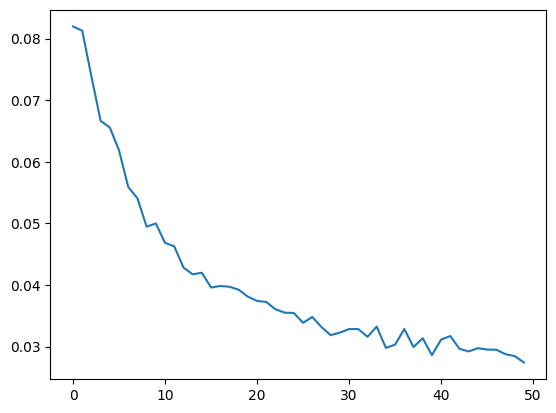

In [91]:
## 
loss_train = history.history["loss"]
plt.plot(loss_train)
plt.show()

